# reinforcement learning



In [0]:
# following the link : 
# https://github.com/adeshpande3/ReinforcementLearning
# Got the practice problem from here: http://i.stack.imgur.com/JHdT2.png

In [0]:
import numpy as np

# This program is to create an RL agent and see if it can learn to perform 
# correctly in a simple environment. The environment will be a 1-D path
# that has a reward at one end of the path. This program uses the Monte Carlo
# technique for adjusting the value function. 

# Monte Carlo is different from
# TD in that you update the value function after each episode, not after 
# each move. This is because we need to observe the total reward until
# the episode finishes, in order to make the value function update. 

# +1 reward at the right, 0 reward everywhere else
# If agent reaches either end, the episode terminates
path = np.array([0,0,0,0,0,0,1])

class Agent:
	def __init__(self):
		self.valueFunction = np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5]) #Value function at every position is the same, initially
		self.curLoc = 3 #Starting index is at the middle
		self.alphaRate = .1

		# V(s) = V(s) + alpha*(G(t) - V(s))
	def simulateEpisode(self):
		positionsVisited = []
		while True:
			positionsVisited.append(self.curLoc)
			probability = np.random.rand()
			if (probability >= .5): # Go Right
				self.curLoc += 1;
				if (self.curLoc == 6):
					# You get a +1 reward if you reach the rightmost space
					self.updateValueFunction(positionsVisited, 1)
					return	
			else: # Go Left
				self.curLoc -= 1;
				if (self.curLoc == 0):
					# You don't get any reward if you reach the leftmost space
					self.updateValueFunction(positionsVisited, 0)
					return

	def updateValueFunction(self, positions, reward):
		if (reward == 1):
			for pos in positions:
				self.valueFunction[pos] += self.alphaRate*(1 - self.valueFunction[pos])
		else:
			for pos in positions:
				self.valueFunction[pos] += self.alphaRate*(-self.valueFunction[pos])

numEpisodes = 1000
my_agent = Agent()
for i in range(0,numEpisodes):
	my_agent.simulateEpisode()
	my_agent.curLoc = 3

print ("The value function is ", my_agent.valueFunction[1:6])

The value function is  [0.11059653 0.13697192 0.15103669 0.30226373 0.76784331]


# QLearning

In [0]:
import numpy as np
import sys
# This program is to create an RL agent and see if it can learn to perform 
# correctly in a simple environment. The environment will be a 1-D path
# that has a reward at one end of the path. This program uses a Q Learning
# approach to find the optimal policy. 

# +1 reward at the right, 0 reward everywhere else
# If agent reaches either end, the episode terminates
path = np.array([0,0,0,0,0,0,1])

class Agent:
	def __init__(self):
		self.QFunction = np.full((path.size, 2), .5) #Action value function at every position is the same, initially
		self.curLoc = 3 #Starting index is at the middle
		self.alphaRate = .1

		# Q(s,a) = Q(s,a) + alpha*(R(t+1) + argmax(Q) - Q(s,a))
	def simulateEpisode(self):
		while True:
			probability = np.random.rand()
			epsilon = .01
			if (probability <= epsilon): #Take random action (epsilon greedy policy)
				probability = np.random.rand()
				if (probability >= .5):
					action = 1; #Go Right
				else:
					action = 0; #Go Left
			else:
				action = np.argmax(self.QFunction[self.curLoc,:]) #Act greedily with respect to the Q function.

			if (action == 1): # Go Right
				self.curLoc += 1;
				if (self.curLoc == 6):
					# You get a +1 reward if you reach the rightmost space
					self.updateQFunction(self.curLoc, action, 1, -1)
					#self.QFunction[self.curLoc-1, action] += self.alphaRate*
					#(1 + np.argmax(self.QFunction[self.curLoc,:]) - self.QFunction[self.curLoc-1, action])
					return
				else:
					self.updateQFunction(self.curLoc, action, 0, -1)
					#self.QFunction[self.curLoc-1, action] += self.alphaRate*
					#(np.argmax(self.QFunction[self.curLoc,:]) - self.QFunction[self.curLoc-1, action])
					
			else: # Go Left
				self.curLoc -= 1;
				if (self.curLoc == 0):
					# You don't get any reward if you reach the leftmost space
					self.updateQFunction(self.curLoc, action, 0, 1)
					#self.QFunction[self.curLoc+1, action] += self.alphaRate*(-self.valueFunction[self.curLoc+1])
					return
				else:
					self.updateQFunction(self.curLoc, action, 0, 1)
					#self.QFunction[self.curLoc+1, action] += self.alphaRate*(self.valueFunction[self.curLoc] - self.valueFunction[self.curLoc+1]


	def updateQFunction(self, location, action, reward, direction):
		self.QFunction[location + direction, action] += self.alphaRate*(reward + np.argmax(self.QFunction[location,:]) - self.QFunction[location + direction, action])

numEpisodes = 100
my_agent = Agent()
for i in range(1,numEpisodes):
	my_agent.simulateEpisode()
	my_agent.curLoc = 3

print ("The value function is ", my_agent.QFunction[1:6])


The value function is  [[0.2657205  0.295245  ]
 [0.46542604 0.45      ]
 [0.29819745 0.99996842]
 [0.5042305  0.99996946]
 [0.45       0.99997223]]


# RandomPathTDZero

In [0]:
import numpy as np

# This program is to create an RL agent and see if it can learn to perform 
# correctly in a simple environment. The environment will be a 1-D path
# that has a reward at one end of the path. This program uses the TD(0)
# technique for adjusting the value function

# +1 reward at the right, 0 reward everywhere else
# If agent reaches either end, the episode terminates

# Got the practice problem from here: http://i.stack.imgur.com/JHdT2.png
path = np.array([0,0,0,0,0,0,1])

class Agent:
	def __init__(self):
		self.valueFunction = np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5]) #Value function at every position is the same, initially
		self.curLoc = 3 #Starting index is at the middle
		self.alphaRate = .1

		# V(s) = V(s) + alpha*(R(t+1) + V(s+1) - V(s))
	def simulateEpisode(self):
		while True:
			probability = np.random.rand()
			if (probability >= .5): # Go Right
				self.curLoc += 1;
				if (self.curLoc == 6):
					# You get a +1 reward if you reach the rightmost space
					self.valueFunction[self.curLoc-1] += self.alphaRate*(1 + self.valueFunction[self.curLoc] - self.valueFunction[self.curLoc-1])
					return
				else:
					self.valueFunction[self.curLoc-1] += self.alphaRate*(self.valueFunction[self.curLoc] - self.valueFunction[self.curLoc-1])
					
			else: # Go Left
				self.curLoc -= 1;
				if (self.curLoc == 0):
					# You don't get any reward if you reach the leftmost space
					self.valueFunction[self.curLoc+1] += self.alphaRate*(-self.valueFunction[self.curLoc+1])
					return
				else:
					self.valueFunction[self.curLoc+1] += self.alphaRate*(self.valueFunction[self.curLoc] - self.valueFunction[self.curLoc+1])


numEpisodes = 1000
my_agent = Agent()
for i in range(1,numEpisodes):
	my_agent.simulateEpisode()
	my_agent.curLoc = 3

print ("The value function is ", my_agent.valueFunction[1:6])
v_function = my_agent.valueFunction[1:6]
v_function = v_function/sum(v_function)

The value function is  [0.32216381 0.4963546  0.69080181 1.01838557 1.29670835]


# reinforcement learning in colab


https://medium.com/@kaleajit27/reinforcement-learning-on-google-colab-9cb2e1ef51e
its colab : https://colab.research.google.com/drive/1AsFzJDEI9OtlmGHyuqr21iMLKy4OgAMg#scrollTo=Enw8EtiQTj1E
https://github.com/ajit2704/Reinforcement-Learning-on-google-colab



## Basic installations

In [2]:
!pip install pyvirtualdisplay
!pip install piglet
  

  Stored in directory: /root/.cache/pip/wheels/d1/8c/16/1c64227974ae29c687e4cc30fd691d5c0fd40f54446dde99da
  Stored in directory: /root/.cache/pip/wheels/41/22/19/af15ef6264c58b625a82641ed7483ad05e258fbd8925505227
Successfully built pyvirtualdisplay EasyProcess
    100% |████████████████████████████████| 61kB 2.4MB/s 
    100% |████████████████████████████████| 92kB 6.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/c7/59/a5/5bd1a35a4a4596714c4c7925a1751e7b1580b6ced363fd7969
Successfully built piglet


In [6]:
!apt-get install python-opengl -y
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 783 kB of archives.
After this operation, 2,266 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.2 [783 kB]
Fetched 783 kB in 1s (999 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 133677 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.2_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.2) ...
Setting up xvfb (2:1.19.6-1ubuntu4.2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [7]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

## First Example

Observation space: Box(2,)
Action space: Discrete(3)


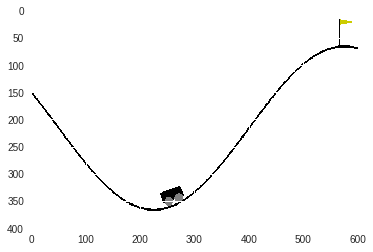

In [11]:
import gym
env = gym.make("MountainCar-v0")

plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

In [12]:
obs0 = env.reset()
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity

initial observation code: [-0.55780145  0.        ]


In [13]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# Note: as you can see, the car has moved to the riht slightly (around 0.0005)

taking action 2 (right)
new observation code: [-0.55654538  0.00125607]
reward: -1.0
is game over?: False


In [14]:
# create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(gym.envs.classic_control.MountainCarEnv(),
                             max_episode_steps=TIME_LIMIT + 1)
s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

# prepare "display"
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

def policy(t):
    if t>50 and t<100:
        return actions['left']
    else:
        return actions['right']


for t in range(TIME_LIMIT):
    
    # change the line below to reach the flag
    s, r, done, _ = env.step(policy(t))
    
    #draw game image on display
    ax.clear()
    ax.imshow(env.render('rgb_array'))
    fig.canvas.draw()
    
    if done:
        print("Well done!")
        break
else:    
    print("Time limit exceeded. Try again.")

<IPython.core.display.Javascript object>

Well done!


<IPython.core.display.Javascript object>

## Second example


In [0]:
"""Auxilary files for those who wanted to solve breakout with CEM or policy gradient"""
import numpy as np
import gym
from scipy.misc import imresize
from gym.core import Wrapper
from gym.spaces.box import Box

class PreprocessAtari(Wrapper):
    def __init__(self, env, height=42, width=42, color=False, crop=lambda img: img, 
                 n_frames=4, dim_order='theano', reward_scale=1,):
        """A gym wrapper that reshapes, crops and scales image into the desired shapes"""
        super(PreprocessAtari, self).__init__(env)
        assert dim_order in ('theano', 'tensorflow')
        self.img_size = (height, width)
        self.crop=crop
        self.color=color
        self.dim_order = dim_order
        self.reward_scale = reward_scale
        
        n_channels = (3 * n_frames) if color else n_frames
        obs_shape = [n_channels,height,width] if dim_order == 'theano' else [height,width,n_channels]
        self.observation_space = Box(0.0, 1.0, obs_shape)
        self.framebuffer = np.zeros(obs_shape, 'float32')
        
    def reset(self):
        """resets breakout, returns initial frames"""
        self.framebuffer = np.zeros_like(self.framebuffer)
        self.update_buffer(self.env.reset())
        return self.framebuffer
    
    def step(self,action):
        """plays breakout for 1 step, returns frame buffer"""
        new_img, reward, done, info = self.env.step(action)
        self.update_buffer(new_img)
        return self.framebuffer, reward * self.reward_scale, done, info
    
    ### image processing ###
    
    def update_buffer(self,img):
        img = self.preproc_image(img)
        offset = 3 if self.color else 1
        if self.dim_order == 'theano':
            axis = 0
            cropped_framebuffer = self.framebuffer[:-offset]
        else:
            axis = -1
            cropped_framebuffer = self.framebuffer[:,:,:-offset]
        self.framebuffer = np.concatenate([img, cropped_framebuffer], axis = axis)

    def preproc_image(self, img):
        """what happens to the observation"""
        img = self.crop(img)
        img = imresize(img, self.img_size)
        if not self.color:
            img = img.mean(-1, keepdims=True)
        if self.dim_order == 'theano':
            img = img.transpose([2,0,1]) # [h, w, c] to [c, h, w]
        img = img.astype('float32') / 255.
        return img


In [17]:
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev xvfb  xorg-dev python-opengl libboost-all-dev libsdl2-dev swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
python-dev is already the newest version (2.7.15~rc1-1).
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
python-numpy set to manually installed.
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
python-opengl is already the newest version (3.1.0+dfsg-1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.2).
The following additional packages will be installed:
  gir1.2-ibus-1.0 libcapnp-0.6.1 libdbus-1-dev libdmx-dev libdmx1
  libfontenc-dev libfs-dev libfs6 libibus-1.0-5 libibus-1.0-dev
  libmirclient-dev libmirclient9 libmircommon-dev libmircommon7
  libmircookie-dev libmircookie2 libmircore-dev libmirco

In [0]:
#I removed this from the installation list in the previous cell libav-tools

In [18]:
import gym

def make_env():
    env = gym.make("KungFuMasterDeterministic-v0")
    env = PreprocessAtari(env, height=42, width=42,
                          crop = lambda img: img[60:-30, 5:],
                          dim_order = 'tensorflow',
                          color=False, n_frames=4,
                          reward_scale = 0.01)
    return env

env = make_env()

obs_shape = env.observation_space.shape
n_actions = env.action_space.n

print("Observation shape:", obs_shape)
print("Num actions:", n_actions)
print("Action names:", env.env.env.get_action_meanings())

Observation shape: (42, 42, 4)
Num actions: 14
Action names: ['NOOP', 'UP', 'RIGHT', 'LEFT', 'DOWN', 'DOWNRIGHT', 'DOWNLEFT', 'RIGHTFIRE', 'LEFTFIRE', 'DOWNFIRE', 'UPRIGHTFIRE', 'UPLEFTFIRE', 'DOWNRIGHTFIRE', 'DOWNLEFTFIRE']


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [20]:
s = env.reset()
for _ in range(100):
    s, _, _, _ = env.step(env.action_space.sample())

plt.title('Game image')
plt.imshow(env.render('rgb_array'))
plt.show()

plt.title('Agent observation (4-frame buffer)')
plt.imshow(s.transpose([0,2,1]).reshape([42,-1]))
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [0]:
import tensorflow as tf
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [22]:
from keras.layers import Conv2D, Dense, Flatten, Input
import keras
from keras.models import Model, Sequential

class Agent:
    def __init__(self, name, state_shape, n_actions, reuse=False):
        """A simple actor-critic agent"""
        
        with tf.variable_scope(name, reuse=reuse):
            
            # Prepare neural network architecture
            ### Your code here: prepare any necessary layers, variables, etc.
#             self.network = Sequential()
            
#             # similar architecture as the dqn
#             self.network.add(Conv2D(32, (3, 3), strides=2, activation='relu', input_shape=state_shape))
#             self.network.add(Conv2D(32, (3, 3), strides=2, activation='relu'))
#             self.network.add(Conv2D(32, (3, 3), strides=2, activation='relu'))
#             self.network.add(Flatten())
#             self.network.add(Dense(128, activation='relu'))
            
#             # logits for n_actions and 1 unit for the state value
#             self.network.add(Dense(n_actions+1, activation='linear'))


            ####
            inputs = Input(shape=state_shape)
            x = Conv2D(32, (3, 3), strides=2, activation='relu')(inputs)
            x = Conv2D(32, (3, 3), strides=2, activation='relu')(x)
            x = Conv2D(32, (3, 3), strides=2, activation='relu')(x)
            x = Flatten()(x)
            x = Dense(128, activation='relu')(x)
            
            # two different output layers
            logits = Dense(n_actions, activation='linear')(x)
            state_value = Dense(1, activation='linear')(x)
            
            self.network = Model(inputs=inputs, outputs=[logits, state_value])
            
            
            # prepare a graph for agent step
            self.state_t = tf.placeholder('float32', [None,] + list(state_shape))
            self.agent_outputs = self.symbolic_step(self.state_t)
        
    def symbolic_step(self, state_t):
        """Takes agent's previous step and observation, returns next state and whatever it needs to learn (tf tensors)"""
        
        # Apply neural network
        ### Your code here: apply agent's neural network to get policy logits and state values.
#         network_output = self.network(state_t)

#         logits = network_output[:,1:]
#         state_value = network_output[:,0]
        
        
        logits, state_value = self.network(state_t)
        state_value = state_value[:, 0]
        
        assert tf.is_numeric_tensor(state_value) and state_value.shape.ndims == 1, \
            "please return 1D tf tensor of state values [you got %s]" % repr(state_value)
        assert tf.is_numeric_tensor(logits) and logits.shape.ndims == 2, \
            "please return 2d tf tensor of logits [you got %s]" % repr(logits)
        # hint: if you triggered state_values assert with your shape being [None, 1], 
        # just select [:, 0]-th element of state values as new state values
        
        return (logits, state_value)
    
    def step(self, state_t):
        """Same as symbolic step except it operates on numpy arrays"""
        sess = tf.get_default_session()
        return sess.run(self.agent_outputs, {self.state_t: state_t})
    
    def sample_actions(self, agent_outputs):
        """pick actions given numeric agent outputs (np arrays)"""
        logits, state_values = agent_outputs
        policy = np.exp(logits) / np.sum(np.exp(logits), axis=-1, keepdims=True)
        return np.array([np.random.choice(len(p), p=p) for p in policy])

Using TensorFlow backend.


In [23]:
agent = Agent("agent", obs_shape, n_actions)
sess.run(tf.global_variables_initializer())

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
state = [env.reset()]
logits, value = agent.step(state)
print("action logits:\n", logits)
print("state values:\n", value)

action logits:
 [[ 0.08876555  0.00458152 -0.03357898  0.01766529  0.01164642 -0.01114269
   0.02090673 -0.01959863  0.0166547   0.00594815 -0.04719053  0.04148352
   0.00597786 -0.01127053]]
state values:
 [0.05575128]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [0]:
def evaluate(agent, env, n_games=1):
    """Plays an a game from start till done, returns per-game rewards """

    game_rewards = []
    for _ in range(n_games):
        state = env.reset()
        
        total_reward = 0
        while True:
            action = agent.sample_actions(agent.step([state]))[0]
            state, reward, done, info = env.step(action)
            total_reward += reward
            if done: break
                
        game_rewards.append(total_reward)
    return game_rewards

In [26]:
env_monitor = gym.wrappers.Monitor(env, directory="kungfu_videos", force=True)
rw = evaluate(agent, env_monitor, n_games=3,)
env_monitor.close()
print (rw)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


[10.0, 7.0, 9.0]


In [27]:
from IPython.display import HTML
import os

video_names = list(filter(lambda s:s.endswith(".mp4"),os.listdir("./kungfu_videos/")))

HTML("""
<video width="640" height="480" controls>
  <source src="{}" type="video/mp4">
</video>
""".format("./kungfu_videos/"+video_names[0])) #this may or may not be _last_ video. Try other indices


In [0]:
class EnvBatch:
    def __init__(self, n_envs = 10):
        """ Creates n_envs environments and babysits them for ya' """
        self.envs = [make_env() for _ in range(n_envs)]
        
    def reset(self):
        """ Reset all games and return [n_envs, *obs_shape] observations """
        return np.array([env.reset() for env in self.envs])
    
    def step(self, actions):
        """
        Send a vector[batch_size] of actions into respective environments
        :returns: observations[n_envs, *obs_shape], rewards[n_envs], done[n_envs,], info[n_envs]
        """
        results = [env.step(a) for env, a in zip(self.envs, actions)]
        new_obs, rewards, done, infos = map(np.array, zip(*results))
        
        # reset environments automatically
        for i in range(len(self.envs)):
            if done[i]:
                new_obs[i] = self.envs[i].reset()
        
        return new_obs, rewards, done, infos

In [29]:
env_batch = EnvBatch(10)

batch_states = env_batch.reset()

batch_actions = agent.sample_actions(agent.step(batch_states))

batch_next_states, batch_rewards, batch_done, _ = env_batch.step(batch_actions)

print("State shape:", batch_states.shape)
print("Actions:", batch_actions[:3])
print("Rewards:", batch_rewards[:3])
print("Done:", batch_done[:3])

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


State shape: (10, 42, 42, 4)
Actions: [13  5  8]
Rewards: [0. 0. 0.]
Done: [False False False]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [0]:
# These placeholders mean exactly the same as in "Let's try it out" section above
states_ph = tf.placeholder('float32', [None,] + list(obs_shape))    
next_states_ph = tf.placeholder('float32', [None,] + list(obs_shape))
actions_ph = tf.placeholder('int32', (None,))
rewards_ph = tf.placeholder('float32', (None,))
is_done_ph = tf.placeholder('float32', (None,))

In [0]:
# logits[n_envs, n_actions] and state_values[n_envs, n_actions]
logits, state_values = agent.symbolic_step(states_ph)
next_logits, next_state_values = agent.symbolic_step(next_states_ph)
next_state_values = next_state_values * (1 - is_done_ph)

# probabilities and log-probabilities for all actions
probs = tf.nn.softmax(logits)            # [n_envs, n_actions]
logprobs = tf.nn.log_softmax(logits)     # [n_envs, n_actions]

# log-probabilities only for agent's chosen actions
logp_actions = tf.reduce_sum(logprobs * tf.one_hot(actions_ph, n_actions), axis=-1) # [n_envs,]

In [32]:
# compute advantage using rewards_ph, state_values and next_state_values
gamma = 0.99
advantage = rewards_ph + gamma*next_state_values - state_values

assert advantage.shape.ndims == 1, "please compute advantage for each sample, vector of shape [n_envs,]"

# compute policy entropy given logits_seq. Mind the "-" sign!
entropy =  -tf.reduce_sum(probs * logprobs, 1, name="entropy")

assert entropy.shape.ndims == 1, "please compute pointwise entropy vector of shape [n_envs,] "



actor_loss =  - tf.reduce_mean(logp_actions * tf.stop_gradient(advantage)) - 0.001 * tf.reduce_mean(entropy)

# compute target state values using temporal difference formula. Use rewards_ph and next_step_values
target_state_values = rewards_ph+gamma*next_state_values

critic_loss = tf.reduce_mean((state_values - tf.stop_gradient(target_state_values))**2 )

train_step = tf.train.AdamOptimizer(1e-4).minimize(actor_loss + critic_loss)
sess.run(tf.global_variables_initializer())

Instructions for updating:
Use tf.cast instead.


In [33]:
# Sanity checks to catch some errors. Specific to KungFuMaster in assignment's default setup.
l_act, l_crit, adv, ent = sess.run([actor_loss, critic_loss, advantage, entropy], feed_dict = {
        states_ph: batch_states,
        actions_ph: batch_actions,
        next_states_ph: batch_states,
        rewards_ph: batch_rewards,
        is_done_ph: batch_done,
    })

assert abs(l_act) < 100 and abs(l_crit) < 100, "losses seem abnormally large"
assert 0 <= ent.mean() <= np.log(n_actions), "impossible entropy value, double-check the formula pls"
if ent.mean() < np.log(n_actions) / 2: print("Entropy is too low for untrained agent")
print("You just might be fine!")

You just might be fine!


In [34]:
from IPython.display import clear_output
from tqdm import trange
from pandas import ewma
env_batch = EnvBatch(10)
batch_states = env_batch.reset()

rewards_history = []
entropy_history = []

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [35]:
for i in trange(100000): 
    
    batch_actions = agent.sample_actions(agent.step(batch_states))
    batch_next_states, batch_rewards, batch_done, _ = env_batch.step(batch_actions)
    
    feed_dict = {
        states_ph: batch_states,
        actions_ph: batch_actions,
        next_states_ph: batch_next_states,
        rewards_ph: batch_rewards,
        is_done_ph: batch_done,
    }
    batch_states = batch_next_states
    
    _, ent_t = sess.run([train_step, entropy], feed_dict)
    entropy_history.append(np.mean(ent_t))

    if i % 500 == 0: 
        if i % 2500 == 0:
            rewards_history.append(np.mean(evaluate(agent, env, n_games=3)))
            if rewards_history[-1] >= 50:
                print("Your agent has earned the yellow belt")

        clear_output(True)
        plt.figure(figsize=[8,4])
        plt.subplot(1,2,1)
        plt.plot(rewards_history, label='rewards')
        plt.plot(ewma(np.array(rewards_history),span=10), marker='.', label='rewards ewma@10')
        plt.title("Session rewards"); plt.grid(); plt.legend()
        
        plt.subplot(1,2,2)
        plt.plot(entropy_history, label='entropy')
        plt.plot(ewma(np.array(entropy_history),span=1000), label='entropy ewma@1000')
        plt.title("Policy entropy"); plt.grid(); plt.legend()        
        plt.show()
        

Output hidden; open in https://colab.research.google.com to view.

In [0]:
    if i % 500 == 0: 
        if i % 2500 == 0:
            rewards_history.append(np.mean(evaluate(agent, env, n_games=3)))
            if rewards_history[-1] >= 50:
                print("Your agent has earned the yellow belt")

        clear_output(True)
        plt.figure(figsize=[8,4])
        plt.subplot(1,2,1)
        plt.plot(rewards_history, label='rewards')
        plt.plot(ewma(np.array(rewards_history),span=10), marker='.', label='rewards ewma@10')
        plt.title("Session rewards"); plt.grid(); plt.legend()
        
        plt.subplot(1,2,2)
        plt.plot(entropy_history, label='entropy')
        plt.plot(ewma(np.array(entropy_history),span=1000), label='entropy ewma@1000')
        plt.title("Policy entropy"); plt.grid(); plt.legend()        
        plt.show()

In [38]:
env_monitor = gym.wrappers.Monitor(env, directory="kungfu_videos", force=True)
final_rewards = evaluate(agent, env_monitor, n_games=1,)
env_monitor.close()
print("Final mean reward:", np.mean(final_rewards))

video_names = list(filter(lambda s:s.endswith(".mp4"),os.listdir("./kungfu_videos/")))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Final mean reward: 282.0
